In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


In [2]:
data_features = pd.read_csv('df_features.csv')
print(data_features.shape)
data_features.head()

(40540, 98)


file_name  signal_mean  signal_std  signal_skew  \
0     38359_Rock_music.wav        0.291       0.350        0.553   
1     50194_Rock_music.wav        0.222       0.278        0.990   
2  24275_Hip_hop_music.wav        0.174       0.232        1.326   
3      43654_Pop_music.wav        0.306       0.373        0.607   
4     41609_Rock_music.wav        0.237       0.298        1.004   

   signal_kurtosis  zcr_mean  zcr_std  rmse_mean  rmse_std    tempo  ...  \
0           -0.679     0.261    0.050      0.349     0.030  107.666  ...   
1           -0.015     0.134    0.027      0.276     0.030  135.999  ...   
2            0.876     0.253    0.061      0.223     0.065  143.555  ...   
3           -0.578     0.084    0.043      0.370     0.051  123.047  ...   
4            0.021     0.165    0.062      0.294     0.047  123.047  ...   

   chroma_stft_3_std  chroma_stft_4_std  chroma_stft_5_std  chroma_stft_6_std  \
0              0.280              0.229              0.221              0.316   
1              0.252              0.294              0.337              0.289   
2              0.333              0.333              0.229              0.153   
3              0.209              0.216              0.260              0.322   
4              0.255              0.186              0.274              0.241   

   chroma_stft_7_std  chroma_stft_8_std  chroma_stft_9_std  \
0              0.195              0.256              0.248   
1              0.281              0.217              0.257   
2              0.155              0.252              0.273   
3              0.299              0.264              0.193   
4              0.222              0.181              0.246   

   chroma_stft_10_std  chroma_stft_11_std  chroma_stft_12_std  
0               0.268               0.256               0.251  
1               0.216               0.286               0.285  
2               0.283               0.306               0.303  
3               0.306               0.272               0.234  
4               0.315               0.170               0.276  

[5 rows x 98 columns]

In [3]:
label_dict = {'Hip':0,
              'Pop':1,
              'Vocal':2,
              'Rhythm':3,
              'Reggae':4,
              'Rock':5,
              'Techno':6,
             }


scalar = MinMaxScaler()
data_features[data_features.columns[1:]] = scalar.fit_transform(data_features[data_features.columns[1:]])
data_features['label'] = data_features['file_name'].apply(lambda x: label_dict[x[:-4].split('_')[1]])
data_features.head()

file_name  signal_mean  signal_std  signal_skew  \
0     38359_Rock_music.wav     0.313240    0.370763     0.140444   
1     50194_Rock_music.wav     0.238967    0.294492     0.155385   
2  24275_Hip_hop_music.wav     0.187298    0.245763     0.166872   
3      43654_Pop_music.wav     0.329386    0.395127     0.142291   
4     41609_Rock_music.wav     0.255113    0.315678     0.155863   

   signal_kurtosis  zcr_mean   zcr_std  rmse_mean  rmse_std     tempo  ...  \
0         0.002384  0.426471  0.190840   0.370488  0.089820  0.322914  ...   
1         0.003066  0.218954  0.103053   0.292994  0.089820  0.473681  ...   
2         0.003982  0.413399  0.232824   0.236730  0.194611  0.513888  ...   
3         0.002488  0.137255  0.164122   0.392781  0.152695  0.404760  ...   
4         0.003103  0.269608  0.236641   0.312102  0.140719  0.404760  ...   

   chroma_stft_4_std  chroma_stft_5_std  chroma_stft_6_std  chroma_stft_7_std  \
0           0.477083           0.463312           0.691466           0.407098   
1           0.612500           0.706499           0.632385           0.586639   
2           0.693750           0.480084           0.334792           0.323591   
3           0.450000           0.545073           0.704595           0.624217   
4           0.387500           0.574423           0.527352           0.463466   

   chroma_stft_8_std  chroma_stft_9_std  chroma_stft_10_std  \
0           0.535565           0.513458            0.557173   
1           0.453975           0.532091            0.449064   
2           0.527197           0.565217            0.588358   
3           0.552301           0.399586            0.636175   
4           0.378661           0.509317            0.654886   

   chroma_stft_11_std  chroma_stft_12_std  label  
0            0.556522            0.548035      5  
1            0.621739            0.622271      5  
2            0.665217            0.661572      0  
3            0.591304            0.510917      1  
4            0.369565            0.602620      5  

[5 rows x 99 columns]

In [4]:

with open('testset_filenames.txt', 'r') as f:
    test_files = f.readlines()
test_files = [t.strip() for t in test_files]

indices = []
for t in test_files:
    indices.append(data_features[data_features.file_name==t].index[0])
    
data_features_test = data_features.iloc[indices,:]
data_features.drop(labels=indices, inplace=True)


x_train = data_features[data_features.columns[1:-1]]
x_test = data_features_test[data_features.columns[1:-1]]
y_train = data_features['label']
y_test = data_features_test['label']


In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
    
        print('Confusion matrix, without normalization')
        

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


def display_results(y_test, pred_probs, cm = True):
    pred = np.argmax(pred_probs, axis=-1)
    print('Test Set Accuracy =  {0:.2f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.2f}'.format(f1_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=label_dict.keys())

Test Set Accuracy =  0.54
Test Set F-score =  0.47
Confusion matrix, without normalization
[[247  56  12   6  10  12  21]
 [ 62 197  20   6   3  70  25]
 [ 16  26  96   4   0  20   9]
 [ 61  74   7  22   6  37  25]
 [ 45  43   5   5  22   9   3]
 [ 10  55  14   1   1 320  15]
 [ 24  41  15   4   1  61 183]]


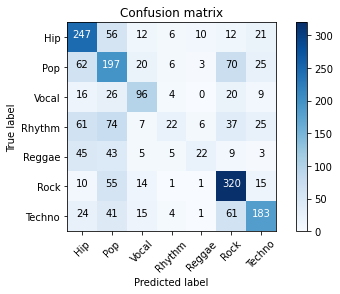

In [6]:

rf_classifier = RandomForestClassifier(n_estimators=500, random_state=20)
rf_classifier.fit(x_train, y_train)
pred_probs = rf_classifier.predict_proba(x_test)
display_results(y_test, pred_probs)

